# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1384 Корякин Айсен. Вариант №7

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
##### Линейная регрессионная модель

Линейная регрессия некоторой зависимой переменной y на набор независимых переменных  x = (x_1, …, x_n), где n – это число наблюдений, предполагает, что линейное отношение между y и x: $y =\beta_0 + \beta_1 x_1 + ⋯ + \beta_nx_n + \epsilon$ - уравнение регрессии. $\beta_0, \beta_1, …, \beta_n$ – коэффициенты регрессии (параметры), и $\epsilon$ – случайная ошибка.

##### МНК (Метод Наименьших Квадратов)

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|^2 \to min\beta$
    
Решение системы нормальных уравнений в регулярном случае: $\hat\beta = (XX^{\intercal})^{-1} XY$ - есть МНК-оценка

##### Несмещённая оценка дисперсии

$s^{2} = \frac{RSS(\hat\beta)}{n-r}$, где $SS_{e}=RSS(\hat\beta)$, r-ранг матрицы X

##### Доверительный интервал

ДНО функции: $\psi=C^{\intercal}\beta$

МНК-оценка: $\hat\psi=C^{\intercal}\beta$

$\frac{\hat\psi-\psi}{S\sqrt{b}}\sim \mathcal{S}_{n-r}$, где $b = C^\intercal (XX^\intercal)^{-1} C$

Тогда Доверительный Интервал уровня доверия $1-\alpha$ будет выглядеть следующим образом: $\left[ \hat\psi - x_{\alpha} s \sqrt{b};\hat\psi + x_{\alpha} s \sqrt{b} \right]$, где $x_{\alpha} = \mathcal{S}_{n-r}^{-1} \left( 1-\frac{\alpha}{2} \right)$

##### Доверительный эллипсоид

Множество $\left\{ \psi:(\psi-\hat\psi)^{\intercal}B^{-1}(\psi-\hat\psi)\le q s^{2}x_{\alpha} \right\}$ представляет доверительный эллипсоид уровня доверия $1 - \alpha$, где $x_{\alpha}$ - квантиль уровня $1-\alpha$ функции распределения хи-квадрат с $(n-r)$ степенями свободы, $B = C^\intercal(XX^\intercal)^{-1} C$, $q$ - размерность $\psi$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
При выполнении работы будет использоваться язык Python.

#### Задание 1.
Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметром сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Построим графически результаты эксперимента

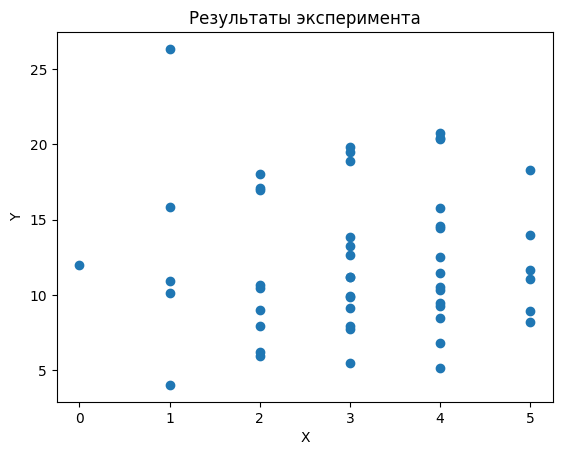

In [1]:
import matplotlib.pyplot as plt

Y_0 = [7.94, 17.12, 10.93, 8.22, 15.85, 20.74, 11.65, 15.79, 19.85, 7.77, 11.49, 9.93, 12.54, 10.11, 7.92, 5.99, 6.22,
    5.51, 9.48, 5.16, 18.05, 13.86, 6.81, 18.91, 18.27, 10.52, 11.18, 9.15, 8.92, 19.51, 12.00, 20.33, 11.08, 8.48,
    10.31, 12.65, 14.45, 4.04, 8.98, 14.55, 10.69, 9.26, 11.19, 26.33, 13.25, 16.97, 9.85, 13.99, 10.49, 20.43]

X_0 = [3, 2, 1, 5, 1, 4, 5, 4, 3, 3, 4, 3, 4, 1, 2, 2, 2, 3, 4, 4, 2, 3, 4, 3, 5, 4, 3, 3, 5, 3, 0, 4, 5, 4, 4, 3,
     4, 1, 2, 4, 2, 4, 3, 1, 3, 2, 3, 5, 2, 4]

n = len(Y_0)

plt.scatter(X_0, Y_0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты эксперимента')
plt.show()

Линейная регрессионная модель:

$ Y = X^T β + \varepsilon , \quad  \varepsilon $ - вектор ошибок

$ \mathbb{E}_\theta \varepsilon = 0 , \quad Var_\theta \varepsilon = \sigma^2 E $

$ \mathbb{E}(Y|X) = \beta_0 + \beta_1X, \quad \beta = (\beta_0, \beta_1) $

МНК оценка:

$ \widehat \beta = (XX^T)^{-1}XY $


In [2]:
import numpy as np

X = np.array([[1 for i in range(50)], X_0])
Y = np.array(Y_0)
XX_T = np.dot(X, X.T)
XX_T_inv = np.linalg.inv(XX_T)
beta = np.dot(np.dot(XX_T_inv, X), Y)
print('beta_0 =', round(beta[0], 6))
print('beta_1 =', round(beta[1], 6))

beta_0 = 12.286946
beta_1 = 0.00234


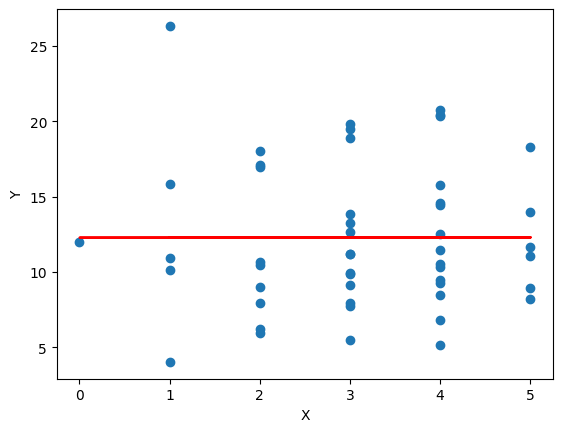

In [3]:
plt.plot(X_0, Y_0, 'o', label='Data')

Y_predicted = np.dot(X.T, beta)
plt.plot(X_0, Y_predicted, color='red', label='Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

$\beta_0 = 12.286946 \quad \beta_1 = 0.00234$

#### Задача 2.
Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 2.30$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.05$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии:

$ s^2 = \frac{1}{n-r} \cdot  (Y - X^T \widehat \beta)^T (Y - X^T \widehat \beta) $

$ r = 2$ - ранг X

In [4]:
s_2 = np.dot((Y - np.dot(X.T, beta)).T, (Y - np.dot(X.T, beta)))/(n-2)
print("s^2:", round(s_2, 6))

s^2: 24.043687


$s^2 = 24.043687$

Построим гисторгамму с шагом h = 2.30 на базе ошибок

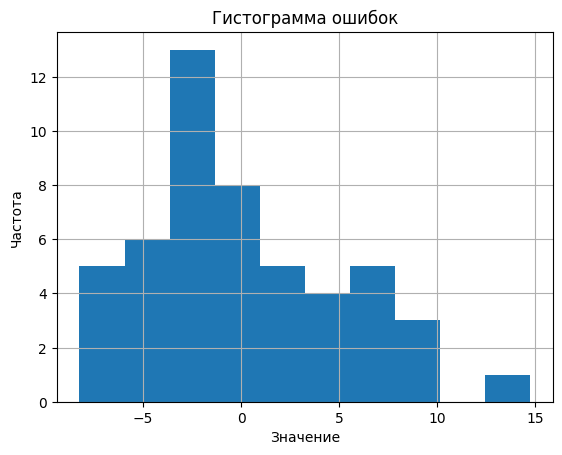

In [5]:
h = 2.3
errors = Y - Y_predicted
hist, bin_edges, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h))
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()

plt.show()

Основная гипотеза: $H_0: \vec{\varepsilon} \sim \mathcal{N}(0, \sigma^2)$<br>
Статистика критерия: $X^2 = \sum_{j=1}^{k}\frac{ (\nu_j - np_{jo})^2 }{ np_{j0} }$, где k - количество интервалов, $\nu_i$ - абсолютная частота, а $p_{j0} = \mathbb{P}(\xi \in I_i) = F_0(b_i) - F_0(a_i)$ - вероятность попадания в интервал, где a, b - границы интервала

Асимптотическое распределение при основной гипотезе: $X^2 ⇒ \chi^2_\mathrm{k-d-1}$

Асимптотический критерий уровня значимости $α:\\ \phi(X) = \begin{cases}
0, X^2≤x_α \\
1, X^2>x_α
 \end{cases} $  

где $x_α: K_\mathrm{k-d-1}(x_α) = 1-α,\space K_\mathrm{k-d-1}$ - функция распределения $\chi^2_\mathrm{k-d-1}$

В нашем случае $α  = 0.05$

Интервалы берем с шагом h = 2.30

In [6]:
from scipy.stats import chi2
from scipy.stats import norm

alpha = 0.05

# проверка гипотезы нормальности ошибок на уровне значимости alpha=0.05
def get_expected_freq(n, bins, s_2):
  k = len(bins)
  probabilities = norm.cdf(bins[1:k], 0, np.sqrt(s_2)) - norm.cdf(bins[0:k-1], 0, np.sqrt(s_2))
  return n*probabilities

expected_freq = get_expected_freq(n, bin_edges, s_2)

chi_stats = np.sum((hist - expected_freq)**2 / expected_freq)
print('Статистика критерия chi^2:', round(chi_stats, 6))
print('Значение х альфа:', round(chi2.ppf(1 - alpha, len(bin_edges) - 1 - 1), 4))

Статистика критерия chi^2: 11.047728
Значение х альфа: 16.919


Так как $X^2 < x_\alpha$ - гипотеза принимается

Оценим расстояние до класса нормальных распределений по Колмогорову:
 $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F(x)|$, где $F_n$ - выборочная функция распределения

 По теореме Колмогорова: $P_{F_0}(\sqrt{n} \cdot D_n) \rightarrow K(x), x \in \mathbb{R}$, где $K(x)$ - функция распределения Колмогорова

In [7]:
from scipy.stats import ksone

errors_intervals = np.arange(min(errors) - h, max(errors) + h, h)
F_n = np.array([np.sum(errors < x)/n for x in errors_intervals])
F = np.array([norm.cdf(x, 0, np.sqrt(s_2)) for x in errors_intervals])
diff = abs(F_n - F)
D_n = max(diff)
print('Значение статистики критерия:', round(D_n*np.sqrt(n), 6))
print('Значение х альфа:', round(ksone.ppf(1 - alpha, n), 4))

Значение статистики критерия: 0.625137
Значение х альфа: 0.1696


Так как $\sqrt{n}D_n > x_\alpha \Longrightarrow$ гипотеза о нормальности отвергается

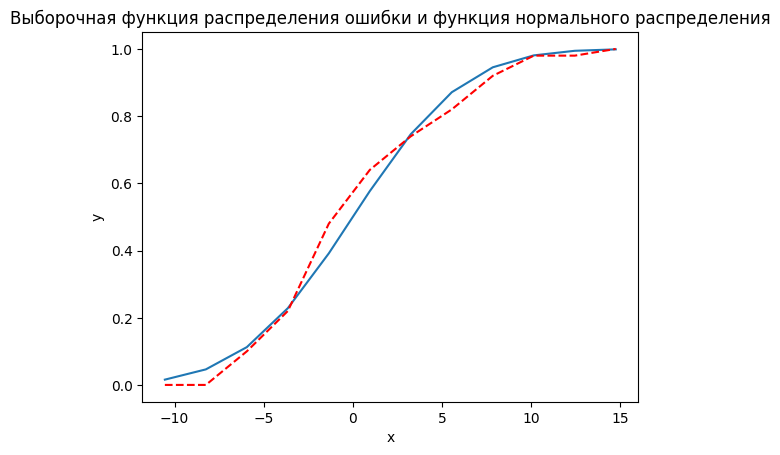

In [8]:
plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(errors_intervals, F)
plt.plot(errors_intervals, F_n, '--r')
plt.show()

#### Задание 3.
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha$. Построить доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$. (вычислить его полуоси)

$\psi = C^T \beta $

$ b_\psi = C^T (XX^T)^{-1}C$ - элемент дисперсии оценки

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

$ \widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi +x_{\alpha}s\sqrt{b} $ - доверительный интервал для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_0 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(1,1) $

Для $\beta_1:$

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} $, $\widehat \psi = \widehat \beta_1 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(2,2) $


In [9]:
from scipy.stats import t
x_a = t.ppf(1 - alpha/2, n-2)
print("Квантиль x_a =", x_a)

C_0 = np.array([1, 0])
b_0 = np.dot(np.dot(C_0.T, np.linalg.inv(np.dot(X, X.T))), C_0)
C_1 = np.array([0, 1])
b_1 = np.dot(np.dot(C_1.T, np.linalg.inv(np.dot(X, X.T))), C_1)

print("b_0:", round(b_0, 4))
print("b_1:", round(b_1, 4))

left_0 = beta[0] - x_a * np.sqrt(s_2) * np.sqrt(b_0)
right_0 = beta[0] + x_a * np.sqrt(s_2) * np.sqrt(b_0)
print("Доверительный интервал для beta_0: [{}; {}]".format(round(left_0, 4), round(right_0, 4)))

left_1 = beta[1] - x_a * np.sqrt(s_2) * np.sqrt(b_1)
right_1 = beta[1] + x_a * np.sqrt(s_2) * np.sqrt(b_1)
print("Доверительный интервал для beta_1: [{}; {}]".format(round(left_1, 4), round(right_1, 4)))

Квантиль x_a = 2.0106347546964454
b_0: 0.1456
b_1: 0.0131
Доверительный интервал для beta_0: [8.5247; 16.0492]
Доверительный интервал для beta_1: [-1.1249; 1.1295]


Построим доверительный эллипсоид уровня доверия $1-\alpha$:

 $A_{\alpha} = \{ \vec{x}: (\vec{x} - \hat{\psi})^t B^{-1} (\vec{x} - \hat{\psi}) \leq q s^2 x_{\alpha} \}$, где $ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha$ - квантиль распределения Фишера-Снедекора

$ B = C^t (XX^t)^{-1} C $

В качестве вектора возьмем $ \vec{x}= P(\hat{\psi} - \psi) $, где P - матрица собственных векторов $XX^t$

$⇒$ уравнение эллипсоида: $ \lambda_1 x^2 + \lambda_2 y^2 \leq q s^2 x_{\alpha} $, где $ \lambda_1, \lambda_2$ - собственные числа матрицы $XX^t $

$ \frac{\lambda_1}{q s^2 x_{\alpha}} x^2 + \frac{\lambda_2}{q s^2 x_{\alpha}} y^2 \leq 1 $

Большая и малая полуоси вычисляются как $ \frac{q s^2 x_{\alpha}}{\lambda_1} $ и $ \frac{q s^2 x_{\alpha}}{\lambda_2} $ соответственно.

In [10]:
from scipy.stats import f

r = 2
eigenvalues, eigenvectors = np.linalg.eig(XX_T)
x_alpha = f.ppf(1-alpha, 2, n-r)
a_2 = 2 * s_2 * x_alpha / eigenvalues[0]
b_2 = 2 * s_2 * x_alpha / eigenvalues[1]

print("Значение x альфа:", round(x_alpha, 4))
print("Собственные числа", eigenvalues)
print("Собственные вектора:", eigenvectors, sep='\n')
print("Большая полуось:", round(a_2, 4))
print("Малая полуось:",  round(b_2, 4))
print("beta0:", round(beta[0], 4))
print("beta1:", round(beta[1], 4))

Значение x альфа: 3.1907
Собственные числа [  6.3682952 600.6317048]
Собственные вектора:
[[-0.96258948 -0.270964  ]
 [ 0.270964   -0.96258948]]
Большая полуось: 24.0934
Малая полуось: 0.2555
beta0: 12.2869
beta1: 0.0023


$ \vec{x}= P(\hat{\psi} - \psi) = \pmatrix{ -0.963 & -0.271 \\ 0.271 & -0.963 } \cdot \pmatrix{ 12.287 - \beta_0 \\ 0.002 - \beta_1 } = \pmatrix{ -11.833 + 0.963\beta_0 + 0.271\beta_1 \\ 3.328 - 0.271\beta_0 + 0.963\beta_1 }$

$\Rightarrow$ область эллипса имеет вид: $ \frac{( -11.833 + 0.963\beta_0 + 0.271)^2}{24.093} + \frac{(3.328 - 0.271\beta_0 + 0.963\beta_1)^2}{0.256} \leq 1 $

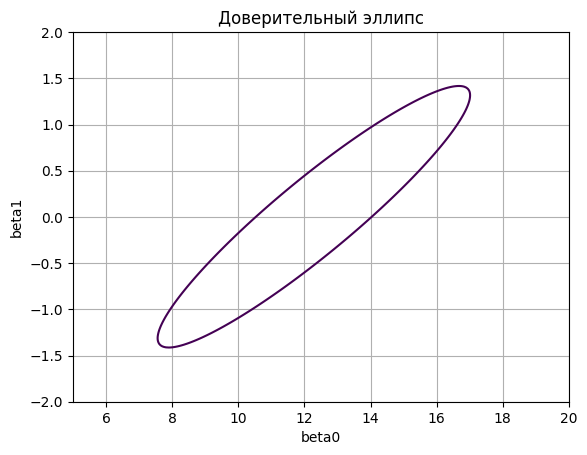

In [11]:
def func_ellipse(b0, b1):
  return (-11.833 + 0.963 * b0 + 0.271 * b1)**2 / a_2 + (3.328 - 0.271 * b0 + 0.963 * b1)**2 / b_2

beta0_values, beta1_values = np.meshgrid(np.linspace(5, 20, 300), np.linspace(-2, 2, 300))
ellipse = func_ellipse(beta0_values, beta1_values)

plt.contour(beta0_values, beta1_values, ellipse, levels=[1])
plt.title('Доверительный эллипс')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.grid()

plt.show()

#### Задание 4.
Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Основная гипотеза о независимости переменной Y от переменной X: $H_0: \beta_1 = 0$

F-статистика: $ \mathbb{F} = \frac{\hat{\psi} B^{-1} \psi }{qs^2} \sim F_{q,n-r}$

$B = C^t (XX^t)^{-1} C $

$ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha $

При основной гипотезе $ C = \pmatrix{0 \\ 1}, \hat{\psi} = \beta_1, q=1$

In [12]:
alpha = 0.05
q = 1
x_alpha = f.ppf(1-alpha, 1, n-2)
C = np.array([0,1])
B = np.dot(np.dot(C.T, np.linalg.inv(XX_T)), C)
F = (beta[1] * 1 * beta[1]) / (B * q * s_2)

print("Значение статистики F:", F)
print("Значение x альфа:", round(x_alpha, 4))

Значение статистики F: 1.741981555908659e-05
Значение x альфа: 4.0427


Так как $ F = 0.0000174 < x_{\alpha} = 4.043 ⟹$ гипотеза принимается

### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Квадратичная регрессионная модель:

$ Y = X^T \beta + \varepsilon , \quad  \varepsilon $ - вектор ошибок

$ E_\theta \varepsilon = 0 , \quad Var_\theta \varepsilon = \sigma^2 E $

$ E(Y|X) = \beta_0 + \beta_1X + \beta_1X^2, \quad \beta = (\beta_0, \beta_1, \beta_2) $

МНК оценка:

$ \widehat \beta = (XX^T)^{-1}XY $

In [13]:
X = np.array([[1 for i in range(50)], X_0, [i**2 for i in X_0]])
Y = np.array(Y_0)
XX_T = np.dot(X, X.T)
XX_T_inv = np.linalg.inv(XX_T)
beta = np.dot(np.dot(XX_T_inv, X), Y)
print('beta_0:', round(beta[0], 6))
print('beta_1:', round(beta[1], 6))
print('beta_2:', round(beta[2], 6))

beta_0: 12.781999
beta_1: -0.426037
beta_2: 0.074768


$\beta_0 = 12.781999$

$\beta_1 = -0.426037$

$\beta_2 = 0.074768$

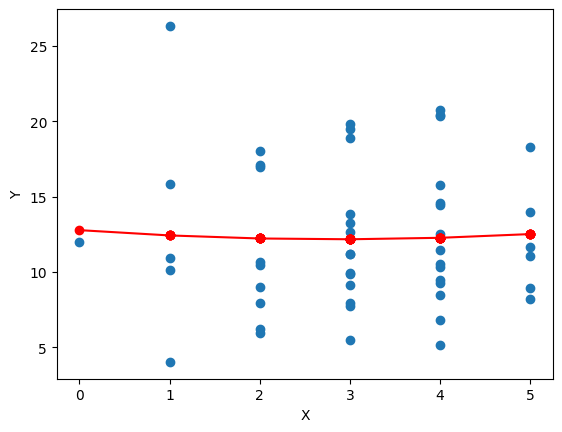

In [15]:
plt.plot(X_0, Y_0, 'o')

X_2 = np.array([[1 for i in range(50)], sorted(X_0), [i**2 for i in sorted(X_0)]])

# Строим линию
Y_predicted = np.dot(X_2.T, beta)
plt.plot(sorted(X_0), Y_predicted, 'o-', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Задание 6
Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Построим несмещенную оценку дисперсии

$ s^2 = \frac{1}{n-r} \cdot  (Y - X^T \widehat \beta)^T (Y - X^T \widehat \beta) $

$ r = 3$ - ранг X

In [16]:
res = np.dot((Y - np.dot(X.T, beta)).T, (Y - np.dot(X.T, beta)))
s_2 = res/(n-3)
print("s^2:", round(s_2, 4))

s^2: 24.5366


$ s^2 = 24.5366$

Построим гистограмму ошибок с шагом h=2.30

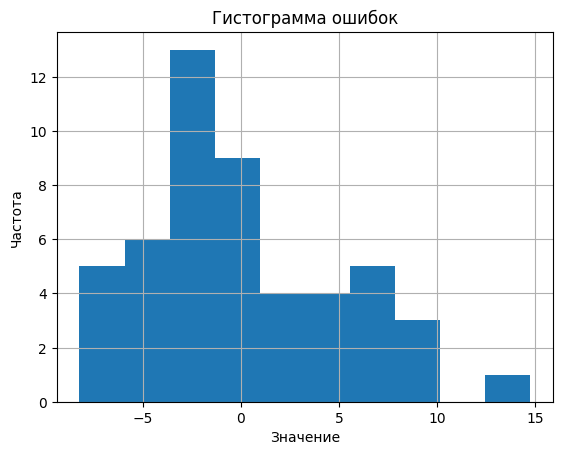

In [17]:
h = 2.3
errors = Y - Y_predicted
hist, bin_edges, _ = plt.hist(errors, bins=np.arange(min(errors), max(errors) + h, h))
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid()

plt.show()

Основная гипотеза: $H_0: \vec{\varepsilon} \sim \mathcal{N}(0, \sigma^2)$<br>
Статистика критерия: $X^2 = \sum_{j=1}^{k}\frac{ (\nu_j - np_{jo})^2 }{ np_{j0} }$, где k - количество интервалов, $\nu_i$ - абсолютная частота, а $p_{j0} = \mathbb{P}(\xi \in I_i) = F_0(b_i) - F_0(a_i)$ - вероятность попадания в интервал, где a, b - границы интервала

Асимптотическое распределение при основной гипотезе: $X^2 ⇒ \chi^2_\mathrm{k-d-1}$

Асимптотический критерий уровня значимости $α:\\ \phi(X) = \begin{cases}
0, X^2≤x_α \\
1, X^2>x_α
 \end{cases} $  

где $x_α: K_\mathrm{k-d-1}(x_α) = 1-α,\space K_\mathrm{k-d-1}$ - функция распределения $\chi^2_\mathrm{k-d-1}$

В нашем случае $α  = 0.05$

Интервалы берем с шагом h = 2.30

In [18]:
expected_freq = get_expected_freq(n, bin_edges, s_2)

chi_stats = np.sum((hist - expected_freq)**2 / expected_freq)
print('Статистика критерия chi^2:', round(chi_stats, 6))
print('Значение х альфа:', round(chi2.ppf(1 - alpha, len(bin_edges) - 1 - 1), 4))

Статистика критерия chi^2: 11.459979
Значение х альфа: 16.919


Так как $X^2 < x_\alpha$ - гипотеза принимается

Оценим расстояние до класса нормальных распределений по Колмогорову:
 $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F(x)|$, где $F_n$ - выборочная функция распределения

 По теореме Колмогорова: $P_{F_0}(\sqrt{n} \cdot D_n) \rightarrow K(x), x \in \mathbb{R}$, где $K(x)$ - функция распределения Колмогорова

In [19]:
values = np.arange(min(errors) - h, max(errors) + h, h)
F_n = np.array([np.sum(errors < x)/n for x in values])
F = np.array([norm.cdf(x, 0, np.sqrt(s_2)) for x in values])
diff = abs(F_n - F)
D_n = max(diff)
print('Значение статистики критерия:', round(D_n*np.sqrt(50), 6))
print('Значение х альфа:', round(ksone.ppf(1 - alpha, 50), 4))

Значение статистики критерия: 0.609274
Значение х альфа: 0.1696


Так как $\sqrt{n}D_n > x_\alpha \Longrightarrow$ гипотеза о нормальности отвергается

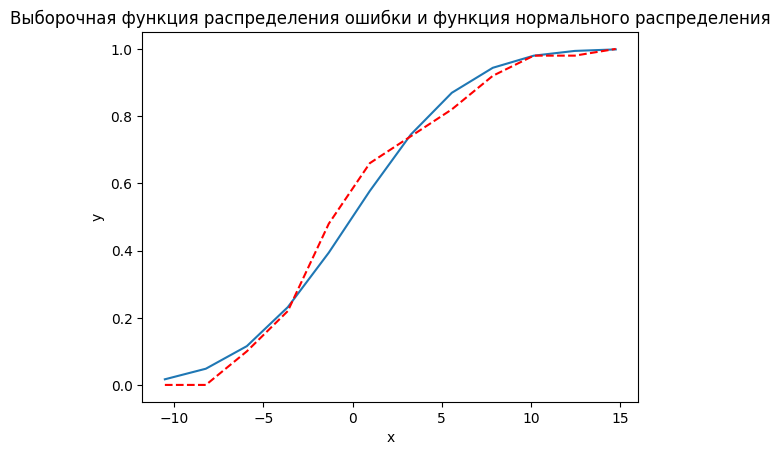

In [20]:
plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(values, F)
plt.plot(values, F_n, '--r')
plt.show()

#### Задание 7.
 В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

$\psi = C^T \beta $

$ b_\psi = C^T (XX^T)^{-1}C$ - элемент дисперсии оценки

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

$ \widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi +x_{\alpha}s\sqrt{b} $ - доверительный интервал для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_0 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(1,1) $

Для $\beta_1:$

$ C = \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_1 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(2,2) $

Для $\beta_2:$

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} $, $\widehat \psi = \widehat \beta_2 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(3,3) $



In [21]:
x_alpha = t.ppf(1 - alpha/2, n-2)
print("Значение x альфа:", round(x_alpha, 4))

C_0 = np.array([1, 0, 0])
b_0 = np.dot(np.dot(C_0.T, np.linalg.inv(np.dot(X, X.T))), C_0)
C_1 = np.array([0, 1, 0])
b_1 = np.dot(np.dot(C_1.T, np.linalg.inv(np.dot(X, X.T))), C_1)
C_2 = np.array([0, 0, 1])
b_2 = np.dot(np.dot(C_2.T, np.linalg.inv(np.dot(X, X.T))), C_2)
print("Матрица XX_T.inv:")
print(np.linalg.inv(np.dot(X, X.T)))
print("b_0:", round(b_0, 4))
print("b_1:", round(b_1, 4))
print("b_2:", round(b_2, 4))

left_0 = beta[0] - x_alpha * np.sqrt(s_2) * np.sqrt(b_0)
right_0 = beta[0] + x_alpha * np.sqrt(s_2) * np.sqrt(b_0)
print("Доверительный интервал для beta_0: [{}; {}]".format(round(left_0, 4), round(right_0, 4)))

left_1 = beta[1] - x_alpha * np.sqrt(s_2) * np.sqrt(b_1)
right_1 = beta[1] + x_alpha * np.sqrt(s_2) * np.sqrt(b_1)
print("Доверительный интервал для beta_1: [{}; {}]".format(round(left_1, 4), round(right_1, 4)))

left_2 = beta[2] - x_alpha * np.sqrt(s_2) * np.sqrt(b_2)
right_2 = beta[2] + x_alpha * np.sqrt(s_2) * np.sqrt(b_2)
print("Доверительный интервал для beta_2: [{}; {}]".format(round(left_2, 4), round(right_2, 4)))

Значение x альфа: 2.0106
Матрица XX_T.inv:
[[ 0.42517905 -0.28242908  0.04222182]
 [-0.28242908  0.22239727 -0.03653523]
 [ 0.04222182 -0.03653523  0.00637679]]
b_0: 0.4252
b_1: 0.2224
b_2: 0.0064
Доверительный интервал для beta_0: [6.2878; 19.2762]
Доверительный интервал для beta_1: [-5.1229; 4.2708]
Доверительный интервал для beta_2: [-0.7206; 0.8701]


Построим доверительный эллипсоид уровня доверия $1-\alpha$:

 $A_{\alpha} = \{ \vec{x}: (\vec{x} - \hat{\psi})^t B^{-1} (\vec{x} - \hat{\psi}) \leq q s^2 x_{\alpha} \}$, где $ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha$ - квантиль распределения Фишера-Снедекора

$B = C^t (XX^t)^{-1} C $

В качестве вектора возьмем $ \vec{x}= P(\hat{\psi} - \psi) $, где P - матрица собственных векторов $XX^t$

$⇒$ уравнение эллипсоида: $ \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2 \leq q s^2 x_{\alpha} $, где $ \lambda_1, \lambda_2, \lambda_3$ - собственные числа матрицы $XX^t $

$ \frac{\lambda_1}{q s^2 x_{\alpha}} x^2 + \frac{\lambda_2}{q s^2 x_{\alpha}} y^2 + \frac{\lambda_3}{q s^2 x_\alpha}z^2 \leq 1 $

Большая и малая полуоси вычисляются как $ \frac{q s^2 x_{\alpha}}{\lambda_1}, \frac{q s^2 x_{\alpha}}{\lambda_2} $ и $\frac{q s^2 x_\alpha}{\lambda_3}$ соответственно.

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(XX_T)
r = 3
x_alpha = f.ppf(1-alpha, 3, n-r)

print("Значение x альфа:", round(x_alpha, 4))
print("Собственные числа:", eigenvalues)
print("Собственные вектора:", eigenvectors.T, sep='\n')
print("Полуось x:", round(3 * s_2 * x_alpha / eigenvalues[0], 4))
print("Полуось y:", round(3 * s_2 * x_alpha / eigenvalues[1], 4))
print("Полуось z:", round(3 * s_2 * x_alpha / eigenvalues[2], 4))

print("beta0:", round(beta[0], 4))
print("beta1:", round(beta[1], 4))
print("beta2:", round(beta[2], 4))

Значение x альфа: 2.8024
Собственные числа: [9.43844672e+03 1.59027004e+00 3.99630130e+01]
Собственные вектора:
[[-0.06143617 -0.23739616 -0.96946824]
 [-0.8141769   0.57376984 -0.08890528]
 [-0.5773574  -0.78385664  0.22853269]]
Полуось x: 0.0219
Полуось y: 129.7143
Полуось z: 5.1618
beta0: 12.782
beta1: -0.426
beta2: 0.0748


$ \vec{x}= P(\hat{\psi} - \psi) = \pmatrix
{ -0.061 & -0.237 & -0.969
\\ -0.814 & 0.574 & - 0.089
\\ -0.577 & -0.784 & 0.229 } \cdot \pmatrix
{ 12.782 - \beta_0 \\ 0.426 - \beta_1 \\ 0.075 - \beta_2 } = \pmatrix
{ -0.953 + 0.061\beta_0 + 0.237\beta_1 + 0.969\beta_2
\\ -10.167 + 0.814\beta_0 - 0.574\beta_1 + 0.089\beta_2
\\ -7.692 + 0.577\beta_0 + 0.784\beta_1 - 0.2296\beta_2}$

$⇒$область эллипса:

 $ \frac{( -0.953 + 0.061\beta_0 + 0.237\beta_1 + 0.969\beta_2 )^2}{12.782} + \frac{(-10.167 + 0.814\beta_0 - 0.574\beta_1 + 0.089\beta_2)^2}{0.426} + \frac{(-7.692 + 0.577\beta_0 + 0.784\beta_1 - 0.2296\beta_2)^2}{0.075} \leq 1 $

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить ее значимость на уровне $\alpha$

Основная гипотеза о линейной зависимости переменной Y от переменной X: $H_0: \beta_2 = 0$

F-статистика: $ \mathbb{F} = \frac{\hat{\psi} B^{-1} \psi }{qs^2} \sim F_{q,n-r}$

$B = C^t (XX^t)^{-1} C $

$ x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha $

При основной гипотезе $ C = \pmatrix{0 \\ 0 \\ 1}, \hat{\psi} = \beta_2, q=1$

In [24]:
alpha = 0.05
q = 1
x_alpha = f.ppf(1-alpha, q, n-3)
print("Значение x альфа:", round(x_alpha, 4))


C = np.array([0,0,1])
B = np.dot(np.dot(C.T, np.linalg.inv(XX_T)), C)
F = (beta[2] * 1 * beta[2]) / (B * q * s_2)
print("Значение статистики F:", round(F, 4))

Значение x альфа: 4.0471
Значение статистики F: 0.0357


Т.к $ \mathbb{F}  \le x_{\alpha} = 4.047 \Longrightarrow$ гипотеза принимается

## Выводы

В ходе данной лабораторной работы были изучены основные теоретические положения, связанные с линейной регрессией и методом наименьших квадратов (МНК),используя которую были получены оценки параметров.

Построены несмещенные оценки дисперсии, проверена гипотеза о нормальности ошибок на уровне значимости хи-квадрат и оценено расстояние до класса нормальных распределений по Колмогорову. Также проверена гипотеза независимости Y от переменной X.

Для параметров построены доверительные интервалы с уровнем доверия $1-\alpha$ и доверительные эллипсоиды.

Был введён дополнительный параметр регрессии, с учётом которого была проделана вся та же работа, но уже с проверкой гипотезы о линейной зависимости Y от X.